In [43]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [44]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\

exp_id='2018_02_06_23_42_45_Open loop Ramsey with Ryd 780A, parked r1-r2, reduced FORT depth'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)

In [45]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [46]:
q.get_thresholds()

{0: [[450], [450], [450]],
 1: [[450], [450], [450]],
 2: [[450], [450], [450]],
 3: [[450], [450], [450]],
 4: [[450], [450], [450]]}

In [47]:
retention = q.apply_thresholds()

In [48]:
np.squeeze(retention['retention'])

array([[ 0.62637363,  0.68852459,  0.72857143,  0.68421053,  0.70588235],
       [ 0.62666667,  0.728     ,  0.78873239,  0.92592593,  1.        ],
       [ 0.56060606,  0.2983871 ,  0.4       ,  0.60869565,  0.84615385],
       [ 0.61797753,  0.06716418,  0.04285714,  0.73913043,  0.71428571],
       [ 0.67948718,  0.416     ,  0.45714286,  0.95238095,  0.86666667],
       [ 0.63888889,  0.66972477,  0.66197183,  0.9       ,  0.76470588],
       [ 0.725     ,  0.51724138,  0.5       ,  0.83870968,  0.76190476],
       [ 0.65853659,  0.22222222,  0.3       ,  0.69565217,  0.8125    ],
       [ 0.63636364,  0.25714286,  0.35211268,  0.73913043,  0.73333333],
       [ 0.55357143,  0.52040816,  0.52857143,  0.88888889,  0.91666667],
       [ 0.71014493,  0.54166667,  0.5       ,  0.76666667,  0.64705882],
       [ 0.75438596,  0.33043478,  0.47142857,  0.75      ,  0.61538462],
       [ 0.6625    ,  0.23770492,  0.34285714,  0.71428571,  0.69230769],
       [ 0.62195122,  0.40740741,  0.5

In [49]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.626 +- 0.035
ivar:	0.00	retention:0.689 +- 0.035
ivar:	0.00	retention:0.729 +- 0.035
ivar:	0.00	retention:0.684 +- 0.035
ivar:	0.00	retention:0.706 +- 0.035
ivar:	0.00	retention:0.627 +- 0.033
ivar:	0.00	retention:0.728 +- 0.033
ivar:	0.00	retention:0.789 +- 0.033
ivar:	0.00	retention:0.926 +- 0.033
ivar:	0.00	retention:1.000 +- 0.033
ivar:	0.00	retention:0.561 +- 0.035
ivar:	0.00	retention:0.298 +- 0.035
ivar:	0.00	retention:0.400 +- 0.035
ivar:	0.00	retention:0.609 +- 0.035
ivar:	0.00	retention:0.846 +- 0.035
ivar:	0.00	retention:0.618 +- 0.018
ivar:	0.00	retention:0.067 +- 0.018
ivar:	0.00	retention:0.043 +- 0.018
ivar:	0.00	retention:0.739 +- 0.018
ivar:	0.00	retention:0.714 +- 0.018
ivar:	0.00	retention:0.679 +- 0.037
ivar:	0.00	retention:0.416 +- 0.037
ivar:	0.00	retention:0.457 +- 0.037
ivar:	0.00	retention:0.952 +- 0.037
ivar:	0.00	retention:0.867 +- 0.037
ivar:	0.00	retention:0.639 +- 0.038
ivar:	0.00	retention:0.670 +- 0.038
ivar:	0.00	retention:0.662 +

In [122]:
def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def sin_fit(datax,datay):
    [fit,p] = curve_fit(sin,datax,datay,[0.4,1,-0.19,1])
    return fit

<IPython.core.display.Javascript object>


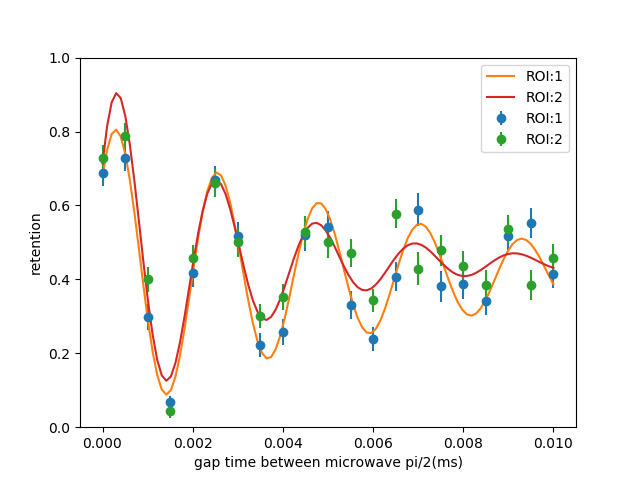

ROI:1, tau: 0.00637872411135 amplitude : 0.409044974991, freq: 444.270007238 , phase:0.701776901378, offset:0.415199633694
ROI:2, tau: 0.00304638494608 amplitude : 0.512751789886, freq: 453.938577089 , phase:0.551812903772, offset:0.44519502777


In [123]:
fig, ax = plt.subplots()
fit_guesses=[0.004,0.3,500,0.7,0.5]
fitted_parameters=[]
for roi in [1,2]:
    
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o')
    fit = curve_fit(decaying_sin,data,reten,fit_guesses)
    print "ROI:{}, tau: {} amplitude : {}, freq: {} , phase:{}, offset:{}".format(roi,fit[0][0],fit[0][1],fit[0][2],fit[0][3],fit[0][4])
    fitted_parameters.append(fit[0])
    #print fit[0]
    xarray=np.linspace(np.min(data),np.max(data),100)
    yfit=decaying_sin(xarray, np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3]),np.float(fit[0][4]))
    plt.plot(xarray,yfit,label="ROI:{}".format(roi))

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab+"(ms)")
ax.set_ylabel('retention')
ax.legend()

In [121]:
print fitted_parameters[0]
print fitted_parameters[1]

tgap=0.002

def freq_diff(roi,y):
    if roi==1:
        result=est_freq(y,tgap,fitted_parameters[0][0],
                        fitted_parameters[0][1],
                        fitted_parameters[0][2],
                        fitted_parameters[0][3],
                        fitted_parameters[0][4]
                       )
    elif roi==2:
        result=est_freq(y,tgap,fitted_parameters[1][0],
                        fitted_parameters[1][1],
                        fitted_parameters[1][2],
                        fitted_parameters[1][3],
                       fitted_parameters[1][4]
                       )
    return result

[  6.37872411e-03   4.09044975e-01   4.44270007e+02   7.01776901e-01
   4.15199634e-01]
[  3.04638495e-03   5.12751790e-01   4.53938577e+02   5.51812904e-01
   4.45195028e-01]
